In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import scipy.stats as ss
import scipy.special as sp
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#from scipy.stats import norm, kurtosis, skew
import itertools as itt
sns.set(rc={'figure.figsize':(11.7,8.27)})
import plots
import importlib
#from pandas_datareader import data, wb
import datetime
import anovastats
#importlib.reload(plots)
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anov

In [3]:
credit = pd.read_csv('credit.data',delimiter=',',header=None)
credit = credit[[10,15]]
credit.columns = [['Fico','Approved']]
#credit['Approved'] = credit['Approved'].apply(lambda x: 1 if x == '+' else 0)

In [4]:
def approval1(col):
    approved = []
    for i in col:
        if (i>750):
            if (random.random() > .1):
                approved.append(1)
            else:
                approved.append(0)
        elif (i>700) & (i<751):
            if (random.random() > .25):
                approved.append(1)
            else:
                approved.append(0)
        elif (i>650) & (i<701):
            if (random.random() > .35):
                approved.append(1)
            else:
                approved.append(0)
        elif (i>600) & (i<651):
            if (random.random() > .4):
                approved.append(1)
            else:
                approved.append(0)
        elif (i>500) & (i<601):
            if (random.random() > .5):
                approved.append(1)
            else:
                approved.append(0)
        else:
            approved.append(0)
    return approved

def approval(i):
    approved = []
    if (i>750):
        if (random.random() > .05):
            approved = 1
        else:
            approved = 0
    elif (i>700) & (i<751):
        if (random.random() > .15):
            approved = 1
        else:
            approved = 0
    elif (i>650) & (i<701):
        if (random.random() > .35):
            approved = 1
        else:
            approved = 0
    elif (i>600) & (i<651):
        if (random.random() > .4):
            approved = 1
        else:
            approved = 0
    elif (i>500) & (i<601):
        if (random.random() > .5):
            approved = 1
        else:
            approved = 0
    else:
        approved = 0
    return approved

# An Introduction
## Example: First-Time Home Buyer
As a first-time home buyer you are busy organizing your financial records so you can apply for a home mortgage. As part of this process you order a copy of your credit report to chekc for errors and gauge your credit score which can range from 300 to 850. Lenders will factor in your credit score when deciding to approve or not approve you for a mortgage. Turns out your score is 720

While doing research you find some raw data online showing 1000 applicant credit scores and whether or not the application was approved

Using the data you found, you would like to do the following:
1. Develop a model that will provide the probability and the odds of being approved for any given credit score.
2. Discover approximately what credit score is associated with a probability of 50% for being approved
3. Input your score of 720 into the model to determine the probability and odds of you being approved for a mortgage.
4. Determine how improving your credit score from 720 to 750 would effect your probability and odds for being approved for the mortgage

Text(0.5,1,'Approved vs FICOscore')

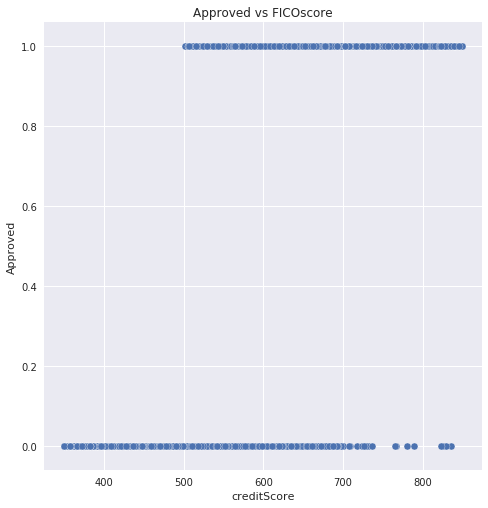

In [5]:
creditScore = []
for i in range(0,1000):
    creditScore.append(random.randrange(350,850))
    
fico_df = pd.DataFrame({'creditScore': creditScore})
fico_df['Approved'] = fico_df['creditScore'].apply(approval)
ax = sns.pairplot(x_vars = 'creditScore', y_vars = 'Approved', data = fico_df, size=7)
plt.title('Approved vs FICOscore')

## What is Logistic Regression
- MODEL the probability of an event occurring depending on the values of the independent variables, which can be categorical or numerical
- ESTIMATE the probability that an event occurs for a randomly selected observation versus the probability that the event does not occur
- PREDICT the effect of a series of variables on a binary response variable
- CLASSIFY observations by estimating the probability that an observation is in particular category (such as approved or not being approved)

## Why not other regression methods
- Simple linear regression is one quantitative variable predicting another
- Multiple regression is simple linear regression with more independent variables
- Nonlinear regression is still two quantitative variables, but the data is curvlinear

Running a typical linear regression in the same way has major problems:
- Binary data does not have a normal distribution, which is a condition needed for most other types of regression
- Predicted values of the DV can be beyond 0 and 1 which violates the definition of probability
- Probabilities are often not linear such as "U" shapes where probability is very low or very high at the extremes of x-values (Ex probability of getting the flu is higher if you're very young or very old)

# Probability Odd, and Odds Ratiol
## Probability Review
\begin{equation}
P = \frac{Outcomes Of Interest}{all Possible Outcomes}
\end{equation}

Fair Coin Flip
- P(heads) = $\frac{1}{2} = 0.5$

Fair Die Roll
- P(1 or 2) = $\frac{2}{6} = 0.333$

Deck of Playing Carde
- P(diamond) = $\frac{13}{52} = 0.25$

## What are Odds
\begin{equation}
odds = \frac{P(Occuring)}{P(notOccuring} \\
odds = \frac{p}{1-p}
\end{equation}

Fair Coin Flip
- odds(heads) = $\frac{0.5}{0.5} = 1$

Fair Die Roll
- odds(1 or 2) = $\frac{0.333}{0.666} = \frac{1}{2} =$ 0.5 or 1:2

Deck of Playing Carde
- odds(diamond) = $\frac{0.25}{0.75} = \frac{1}{3} =$ 0.333 or 1:3

## Odds Ration

Fair Coin Flip
- P(heads) = $\frac{1}{2} = 0.5$
- odds(heads) = $\frac{0.5}{0.5} = 1$

Loaded Coin Flip
- P(heads) = $\frac{7}{10} = 0.7$
- odds(heads) = $\frac{0.7}{0.3} = 2.333$

\begin{equation}
oddsRatio = \frac{odds_1}{odds_0} \\
oddsRatio = \frac{\frac{p_1}{1-p_1}}{\frac{p_0}{1-p_0}} \\
oddsRatio = \frac{\frac{.7}{.3}}{\frac{.5}{.5}} = \frac{.7}{.3}*\frac{.5}{.5}=\frac{.35}{.15} = 2.333
\end{equation}

The odds of getting "heads" on the loaded coin are 2.333x greater than the fair coin

## Odds Ratio in Logistic Regression
- The odds ratio for a variable in logistic regression represents how the odds change with a 1 unit increase in that variable holding all other variables constant

#### Example
- Body weight and sleep apnea (two categories: apnea/ no apnea)
- Weight variable had an odds ratio of 1.07
- This means a one pound increase in weight increases the odds of having sleep apna by 1.07
- A ten pound increase in weight increases the odds to 1.98 or almost doubles a persons odds of having sleep apnea and a 20 pound inrease raises the odds to 3.87 or almost 4x greater
- This holds true at any point in the weight spectrum

## A Warning
- It is very important to seperate probability and odds
- In the previous example a person gaining 20 pounds increases their odds of sleep apnea by almost a factor of 4 regardless of their starting weight
- However the probability of having apnea is lower in people with a lower body weight to begin with
- So while the odds are 4x greater, the probability may still be low
- Basically what this means is that the odds can have a large magnitude even if the underlying probabilities are low

# Logit and Regression Equation
## Bringing back Bernoulli
- The dependent variable in logistic regression follows the Bernoulli distribution having an unknown probability, p 
- Remember that the Bernoulli distribution is just a special case of the Binomial distribution where n = 1
- Success is "1" and failure is "0"
- So the probability of success is p and failure is q = 1 - p
- In logistic regression we are estimating an unknown p for any given linear combination of the independent variables
- Therefore we need to link together variables to essentially the Bernoulli distribution; that link is called the logit

## What is the Logit

In logistic regression we do not know p like we do in Binomial (Bernoulli) distribution problems. The goal of logistic regression is to estimate p for a linear combination of the independent variables. Estimate of p is p-hat $\hat p$

To tie together our linear combination of variables and in essence the Bernoulli distribution we need a function that links them together, or maps the linear combination of variables that could result in any value onto the Bernoulli probability distribution with a domain of 0 to 1. The natural log of the odds ratio, the logit, is that link function

$ln(odds) -> ln(\frac{p}{1-p})$ is the logit(p) OR $ln(p)-ln(1-p)=logit(p)$

Reminder: $log_e(x) - ln(x)$

## $ln(\frac{p}{1-p})$ is the logit(p)

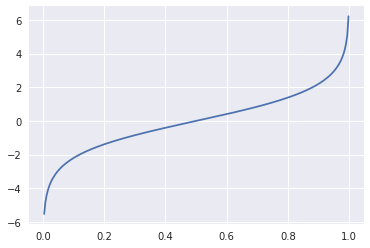

In [6]:
x = np.linspace(0,2, 500)
y = sp.logit(x)
plt.plot(x,y)

## What is the Inverse Logit
In our logit link function graph, 0 to 1 ran along the x-axis but we want the probabilities to be on the y-axis. We can achieve that by taking the inverse of the logit function

\begin{equation}
logit(p) = ln(\frac{p}{1-p})
\end{equation}

where p is between 0 and 1

\begin{equation}
logit^{-1}(\alpha) = \frac{1}{1+e^{-\alpha}} = \frac{e^{\alpha}}{1+e^{\alpha}}
\end{equation}
where $\alpha$ = some number

In our case, some number will be the linear combination of variables and their coefficients. The inverse-logit will return the probability of being a "1" or in the "event occurs" group

Mean Function:
\begin{equation}
\mu_{y|x} = \frac{1}{1+e^{-\alpha}} = \frac{e^{\alpha}}{1+e^{\alpha}}
\end{equation}

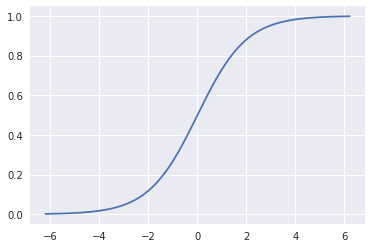

In [7]:
x = np.linspace(0,1, 500)
y = sp.logit(x)
plt.plot(y,x)

## Estimated Regression Equation
The natural logarithm of the odds ratio is equivalent to a linear function of the independent variables. The antilog of the logit function allows us to find the estimated regression equation

\begin{equation}
logit(p) = ln(\frac{p}{1-p}) = \beta_0 + \beta_1x_1 \\
\end{equation}
antilog ->
\begin{equation}
\frac{p}{1-p} = e^{\beta_0 + \beta_1x_1} \\
p = e^{\beta_0 + \beta_1x_1}(1-p) \\
p + e^{\beta_0 + \beta_1x_1} - e^{\beta_0 + \beta_1x_1} *p \\
p(1 + e^{\beta_0 + \beta_1x_1}) = e^{\beta_0 + \beta_1x_1} \\
\hat p = \frac{e^{\beta_0 + \beta_1x_1}}{1+e^{\beta_0 + \beta_1x_1}}
\end{equation}

# Estimating the Probability

In [51]:
fico_df.groupby('Approved').count()
ss.linregress(fico_df)
model = smf.ols('Approved ~ creditScore',data=fico_df).fit()
params = model.params
slope = params[1]
intercept = params[0]
print(params)
anov.anova_lm(model)
a = fico_df['creditScore'] > 0
b = fico_df['Approved'] > 0
cross = fico_df.groupby([a,b]).count()
cr = ss.fisher_exact(cross) # Odds Ratio
#sp.expit(cr)

Intercept     -0.942751
creditScore    0.002435
dtype: float64


/usr/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


\begin{equation}
\hat p = \frac{e^{-9.38584 + 0.002361x_1}}{1+e^{-9.38584 + 0.002361x_1}}
\end{equation}

$\hat p$ is the estimated probability of being approved and $x_1$ is a credit score

In [70]:
def est_reg_equa(intercept, slope, score):
    x = score
    p_hat = math.exp(intercept + slope*x)/(1 + math.exp(intercept + slope*x))
    odds = p_hat / (1 - p_hat)
    return p_hat, odds

p_hat_720, odds_720 = est_reg_equa(intercept, slope, 720)
p_hat_721, odds_721 = est_reg_equa(intercept, slope, 721)

print('p hat (720 Fico Score) = {}\n odds (720 Fico Score) = {}'.format(p_hat_720, odds_720))
print('p hat (721 Fico Score) = {}\n odds (721 Fico Score) = {}'.format(p_hat_721, odds_721))
Odds_Ratio = odds_721/odds_720
print('Odds Ratio {}'.format(Odds_Ratio))

p hat (720 Fico Score) = 0.6921558988907615
 odds (720 Fico Score) = 2.2483974726062717
p hat (721 Fico Score) = 0.6926744280045924
 odds (721 Fico Score) = 2.253878268271614
Odds Ratio 1.0024376453594699


#### Odds ratio for a 1 point increase in FICO score: $\frac{2.2484}{2.2539} = 1.002$

In [53]:
a = sp.expit(fico_df)
import statsmodels.api as sm # import statsmodels 

X = fico_df["creditScore"] ## X usually means our input variables (or independent variables)
y = fico_df["Approved"] ## Y usually means our output/dependent variable

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
(model.summary())

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Approved   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     1019.
Date:                Tue, 15 May 2018   Prob (F-statistic):          1.15e-154
Time:                        17:09:40   Log-Likelihood:                -373.96
No. Observations:                1000   AIC:                             751.9
Df Residuals:                     998   BIC:                             761.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.9428      0.047    -20.268      

In [54]:
lm = LinearRegression()
lm.fit(X,y)
predictions = lm.predict(X)
#print(predictions)[0:5]
print("R Squared = {}".format(lm.score(X,y))) # This is the R² score of our model. As you probably remember, this the percentage of explained variance of the predictions.
print("y-intercept = {}".format(lm.intercept_))
print("Slope = {}".format(lm.coef_[1]))

R Squared = 0.5052239701893465
y-intercept = -0.9427512393961827
Slope = 0.0024346791214665017


In [69]:
lma = LogisticRegression()
#lma = LogisticRegression()
X1 = fico_df[['creditScore']]
#X = X.reshape(1,-1)
y1 = (fico_df['Approved'])
lma.fit(X,y)
print("R Squared = {}".format(lma.score(X,y))) # This is the R² score of our model. As you probably remember, this the percentage of explained variance of the predictions.
print("y-intercept = {}".format(lma.intercept_))
print("Slope = {}".format(lma.coef_[0][1]))


R Squared = 0.802
y-intercept = [-4.05487095]
Slope = 0.013769518547993428


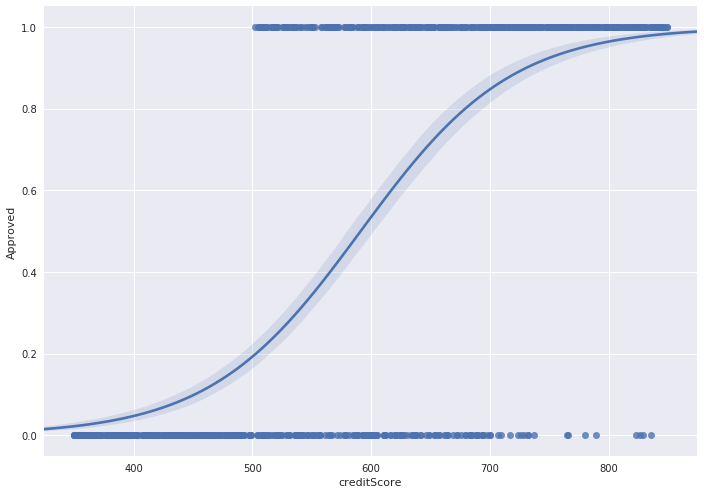

In [56]:
sns.regplot(x='creditScore', y = 'Approved', data=fico_df, logistic=True)

# Odds Ratio for any Interval

In [238]:
slope = 0.014634
intercept = -9.346
def est_reg_equa(score, intercept, slope):
    x = score
    p_hat = math.exp(intercept + slope*score)/(1 + math.exp(intercept + slope*score))
    odds = p_hat / (1 - p_hat)
    return p_hat, odds

fico_df1 = fico_df.sort_values(by="creditScore")
x = fico_df1['creditScore'].apply(est_reg_equa, args = (intercept,slope))
phats = [x[0] for x in x.values]
odds = [x[1] for x in x.values]

fico_df1['p_hat'] = phats
fico_df1['1 - p_hat'] = 1 - fico_df1['p_hat']
fico_df1['odds'] = odds
scors = np.arange(600,710,10)
fic = fico_df1[fico_df['creditScore'].isin(scors)].drop_duplicates(subset='creditScore')
fic

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,creditScore,Approved,p_hat,1 - p_hat,odds
79,600,0,0.362253,0.637747,0.568019
15,610,1,0.396694,0.603306,0.657533
23,620,0,0.432190,0.567810,0.761154
511,630,0,0.468397,0.531603,0.881104
600,640,1,0.504940,0.495060,1.019957
457,650,1,0.541430,0.458570,1.180691
896,660,1,0.577481,0.422519,1.366756
129,680,0,0.646827,0.353173,1.831472
904,690,1,0.679497,0.320503,2.120093
130,700,0,0.710497,0.289503,2.454198


\begin{equation}
\hat p = \frac{e^{\beta_0 + \beta_1x_1}}{1+e^{\beta_0 + \beta_1x_1}} \\
\hat p = \frac{e^{-9.346 + 0.014634(655}}{1+e^{-9.346 + 0.014634(655)}} = 0.5595 \\
\hat p = \frac{e^{-9.346 + 0.014634(745}}{1+e^{-9.346 + 0.014634(745)}} = 0.8258 \\
\end{equation}

The Probability of getting approved is 55.9% if FICO score is 655 and 82.58% if FICO score is 745

## What are Odds if you increase your FICO score from 655 to 745
\begin{equation}
odds = \frac{odds(FICO of 745)}{odds(FICO of 655)} \\
odds = \frac{\frac{.825}{1-.825}}{\frac{.559}{1 - .559}} = 3.73
\end{equation}

The odds increase by 3.73

## What are Odds if you increase your FICO score from 600 to 690
\begin{equation}
odds = \frac{odds(FICO of 690)}{odds(FICO of 600)} = 3.73 \\
\end{equation}


### A characteristic of Logistical Regression is when you comparing the odds ratio for two scores the same distance apart, the odds ratio will be the same

In [268]:
def odds(score, intercept, slope):
    x = score
    p_hat = math.exp(intercept + slope*score)/(1 + math.exp(intercept + slope*score))
    odds = p_hat / (1 - p_hat)
    return odds

odds_r = pd.DataFrame({'Increase': np.arange(0,110,10)})

odds_r['Odds'] = odds_r['Increase'].apply(odds, args = (intercept,slope))
odds_r['Odds Ratio'] = odds_r['Odds'] / odds_r.loc[0,'Odds']
odds_r['% Increase'] = (odds_r['Odds Ratio'] - odds_r.loc[0, 'Odds Ratio'])  / odds_r.loc[0, 'Odds Ratio'] *100
odds_r

,Increase,Odds,Odds Ratio,% Increase
0,0,0.000087,1.000000,0.000000
1,10,0.000101,1.157590,15.758970
2,20,0.000117,1.340014,34.001392
3,30,0.000135,1.551186,55.118631
4,40,0.000157,1.795637,79.563730
5,50,0.000181,2.078611,107.861124
6,60,0.000210,2.406179,140.617897
7,70,0.000243,2.785368,178.536800
8,80,0.000282,3.224313,222.431331
9,90,0.000326,3.732432,273.243188


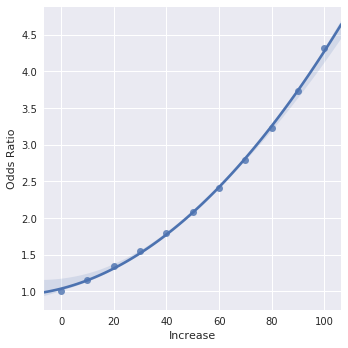

In [276]:
sns.lmplot(x = 'Increase', y = 'Odds Ratio', order=2, data = odds_r, size = 5)

### $y = e^{\beta_1 \Delta} = e^{0.0146 \Delta}$
### $\hat p = \frac{e^{-9.346 + 0.014634(x_1}}{1+e^{-9.346 + 0.014634(x_1)}} = 0.8258$

## Solve for Credit Score
\begin{equation}
ln(\frac{p}{1-p}) = \beta_0 + \beta_1x_1 \\
ln(\frac{.5}{.5}) = -9.346 + 0.014634x_1 \\
ln(1) = -9.346 + 0.014634x_1 \\
0 = = -9.346 + 0.014634x_1 \\
-9.346 = 0.014634x_1 \\
x_1 = 638.65
\end{equation}

You would need a score of 638.65 to have a 50/50 chance

In [ ]:
lma = LogisticRegression()
#lma = LogisticRegression()
X1 = fico_df[['creditScore']]
#X = X.reshape(1,-1)
y1 = (fico_df['Approved'])
lma.fit(X,y)
print("R Squared = {}".format(lma.score(X,y))) # This is the R² score of our model. As you probably remember, this the percentage of explained variance of the predictions.
print("y-intercept = {}".format(lma.intercept_))
print("Slope = {}".format(lma.coef_[0][1]))